In [6]:
import back_test
import numpy as np
import pandas as pd
import seaborn as sb

In [9]:
DATA_PATH = "./data/"
dat = pd.read_parquet(DATA_PATH + "eurusd.parquet")
dat.shape, dat.columns

((661062, 3), Index(['time', 'close', 'volume'], dtype='object'))

In [54]:
opt_trades = {}
dd_constraints = np.arange(7,101,1)
for dd_bps in dd_constraints:
    opt_trades[dd_bps] = back_test.target_optimal(df_price = dat.close,
                                                  fee_bps = 3,
                                                  dd_bps = dd_bps)
    
    print(f"Done optimizing labels with dd_bps constraint = {dd_bps}.")

Done optimizing labels with dd_bps constraint = 10.
Done optimizing labels with dd_bps constraint = 20.


In [55]:
stats = {} # trading statistics
for dd_bps in dd_constraints:
    trades_in = dat.copy()
    trades_in['S'] = 0
    trades_in['L'] = 0
    trades_in['C'] = 0
    trades_in.loc[opt_trades[dd_bps] == 0, 'S'] = 1
    trades_in.loc[opt_trades[dd_bps] == 1, 'L'] = 1
    trades_in.loc[opt_trades[dd_bps] == 2, 'C'] = 1

    stats[dd_bps] = back_test.trade_stats(trades_in)

In [56]:
importlib.reload(back_test)
trades_in

,time,close,volume,S,L,C
0,2009-01-02 00:10:00,1.38730,215.0,0,0,1
1,2009-01-02 00:20:00,1.38790,228.0,0,0,1
2,2009-01-02 00:30:00,1.38590,483.0,0,0,1
3,2009-01-02 00:40:00,1.38510,592.0,0,0,1
4,2009-01-02 00:50:00,1.38470,883.0,0,0,1
...,...,...,...,...,...,...
661057,2021-07-28 16:20:00,1.18485,607.0,0,0,1
661058,2021-07-28 16:30:00,1.18481,441.0,0,0,1
661059,2021-07-28 16:40:00,1.18467,377.0,0,0,1
661060,2021-07-28 16:50:00,1.18430,482.0,0,0,1


In [57]:
stats # TODO: fix the overlap between longs and shorts -> fix the max drawdown, something with list.index()

{10: {'annual return': 2.27,
  'sharpe': 24.37,
  'sortino': 43.56,
  'std_deviation': 0.093,
  'total_return': 40.0689,
  'trade_count_long': 11897,
  'trade_count_short': 17440,
  'trade_count_total': 29337,
  'average_return_long': 4.865,
  'average_return_short': 2.4251,
  'accuracy_long': 0.988,
  'accuracy_short': 1.0,
  'accuracy_total': 0.995,
  'max_drawdown': -0.3038000000000398,
  'max_drawdown_days': 331},
 20: {'annual return': 2.049,
  'sharpe': 22.14,
  'sortino': 39.26,
  'std_deviation': 0.093,
  'total_return': 36.1705,
  'trade_count_long': 9250,
  'trade_count_short': 17293,
  'trade_count_total': 26543,
  'average_return_long': 5.2464,
  'average_return_short': 2.4228,
  'accuracy_long': 0.952,
  'accuracy_short': 1.0,
  'accuracy_total': 0.983,
  'max_drawdown': -0.3038000000000398,
  'max_drawdown_days': 331}}

<AxesSubplot:xlabel='dd_bps', ylabel='annual return'>

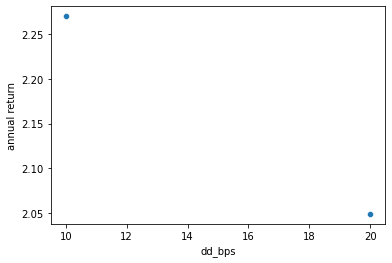

In [61]:
df_stats = pd.DataFrame.from_dict(stats, orient = 'index')
df_stats['dd_bps'] = df_stats.index
sb.scatterplot(data = df_stats,
               x = 'dd_bps',
               y = 'annual_return')

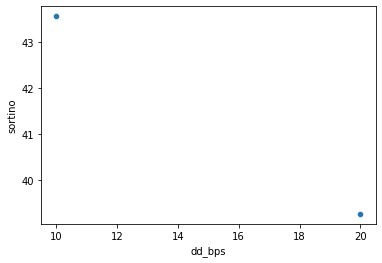

In [62]:
p = sb.scatterplot(data = df_stats,
                   x = 'dd_bps',
                   y = 'sortino')

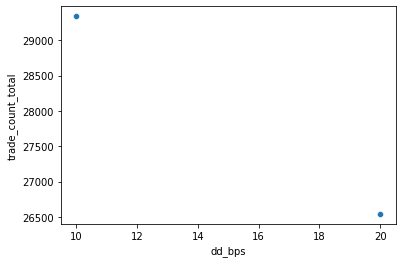

In [65]:
p = sb.scatterplot(data = df_stats,
                   x = 'dd_bps',
                   y = 'trade_count_total')

Separate code for model development and optimization.